# Assignment 2 - Prediction using Supervised ML 

## Author - Harshita Mehta

**Problem Statement:** Perform EDA and Statistical analysis of data followed by Developing a model, to predict the 
column “Goal”.

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loading the dataset

df = pd.read_csv("ailerons_train.csv")
df.head()

,climbRate,Sgz,p,q,curPitch,curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,...,diffSeTime8,diffSeTime9,diffSeTime10,diffSeTime11,diffSeTime12,diffSeTime13,diffSeTime14,alpha,Se,goal
0,2,-56,-0.33,-0.09,0.90,0.2,-11,12,0.004,-0.1,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.032,-0.0009
1,470,-39,0.02,0.12,0.39,-0.6,-12,8,0.009,-1.6,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.034,-0.0011
2,165,4,0.14,0.14,0.78,0.4,-11,-9,-0.003,-0.2,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,1.0,0.034,-0.0012
3,-113,5,-0.12,0.11,1.06,0.6,-10,-7,-0.008,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.033,-0.0011
4,-411,-21,-0.17,0.07,1.33,-0.6,-11,0,0.002,0.1,...,0.0,0.0,0.0,0.0,0.0,-0.002,0.0,0.9,0.032,-0.0008


In [3]:
# checking dimensions of the data
df.shape

(12250, 41)

In [4]:
# using info() method to check column names, number of non-null values of the columns, dtype and memory usage

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250 entries, 0 to 12249
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   climbRate     12250 non-null  int64  
 1   Sgz           12250 non-null  int64  
 2   p             12250 non-null  float64
 3   q             12250 non-null  float64
 4   curPitch      12250 non-null  float64
 5   curRoll       12250 non-null  float64
 6   absRoll       12250 non-null  int64  
 7   diffClb       12250 non-null  int64  
 8   diffRollRate  12250 non-null  float64
 9   diffDiffClb   12250 non-null  float64
 10  SeTime1       12250 non-null  float64
 11  SeTime2       12250 non-null  float64
 12  SeTime3       12250 non-null  float64
 13  SeTime4       12250 non-null  float64
 14  SeTime5       12250 non-null  float64
 15  SeTime6       12250 non-null  float64
 16  SeTime7       12250 non-null  float64
 17  SeTime8       12250 non-null  float64
 18  SeTime9       12250 non-nu

**Observation**

We can observe that this dataset does not contain null values. 

The datatypes are float and integer.

Memory usage is 3.8 MB.

## Exploratory Data Analysis(EDA) 

In [5]:
# checking duplicates

df.duplicated().sum()

0

Dataset does not contain duplicate values

In [6]:
# using describe() method, which shows statistical characteristics of each numerical column.

df.describe()

,climbRate,Sgz,p,q,curPitch,curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,...,diffSeTime8,diffSeTime9,diffSeTime10,diffSeTime11,diffSeTime12,diffSeTime13,diffSeTime14,alpha,Se,goal
count,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,...,12250.000000,12250.000000,1.225000e+04,12250.000000,1.225000e+04,12250.000000,1.225000e+04,12250.000000,12250.000000,12250.000000
mean,-9.362939,-12.632408,0.006878,0.061144,0.626213,0.067045,-11.068816,-0.919592,-0.000970,-0.053698,...,0.000000,-0.000103,-5.714286e-07,-0.000100,-6.530612e-07,-0.000096,-3.265306e-07,0.622106,0.021949,-0.000871
std,259.502687,25.727234,0.305488,0.118447,0.312061,0.969050,4.094653,10.405533,0.013352,1.121631,...,0.000013,0.000621,8.806480e-05,0.000644,5.569441e-05,0.000617,3.129801e-05,0.195486,0.006912,0.000404
min,-975.000000,-99.000000,-1.530000,-0.540000,-0.420000,-3.100000,-23.000000,-43.000000,-0.099000,-8.800000,...,-0.001000,-0.006000,-6.000000e-03,-0.006000,-4.000000e-03,-0.006000,-3.000000e-03,0.400000,0.012000,-0.003600
25%,-176.000000,-29.000000,-0.220000,-0.020000,0.420000,-0.600000,-14.000000,-8.000000,-0.009000,-0.300000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.500000,0.018000,-0.001100
50%,-20.000000,-13.000000,0.020000,0.060000,0.610000,0.200000,-11.000000,-1.000000,-0.001000,-0.100000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.600000,0.020000,-0.000800
75%,159.000000,3.000000,0.230000,0.130000,0.800000,0.700000,-8.000000,6.000000,0.008000,0.200000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.700000,0.023000,-0.000600
max,977.000000,94.000000,1.060000,0.620000,2.580000,2.900000,-3.000000,46.000000,0.056000,11.200000,...,0.001000,0.003000,6.000000e-03,0.005000,2.000000e-03,0.007000,1.000000e-03,2.000000,0.073000,-0.000200


climbRate
Feature: climbRate


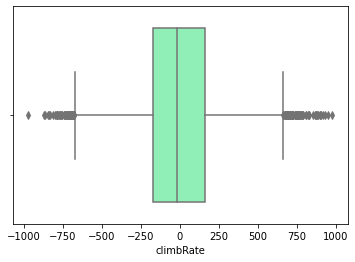

Sgz
Feature: Sgz


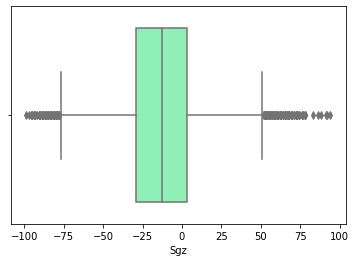

p
Feature: p


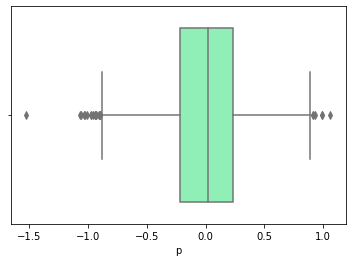

q
Feature: q


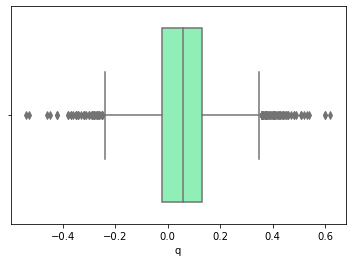

curPitch
Feature: curPitch


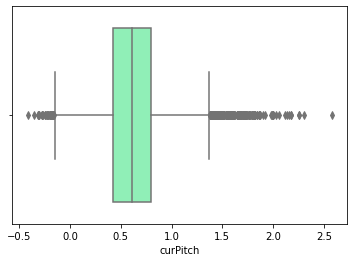

curRoll
Feature: curRoll


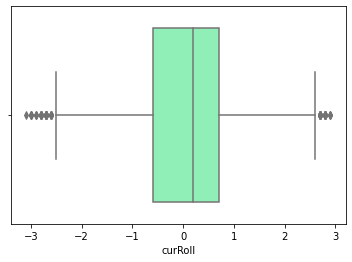

absRoll
Feature: absRoll


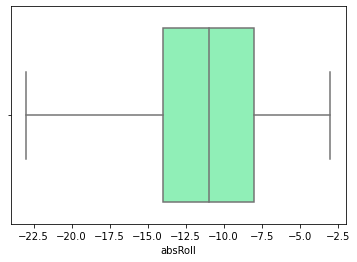

diffClb
Feature: diffClb


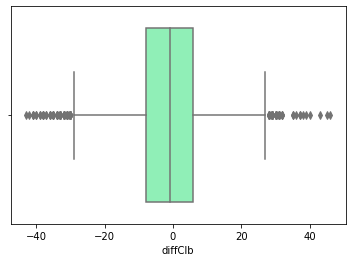

diffRollRate
Feature: diffRollRate


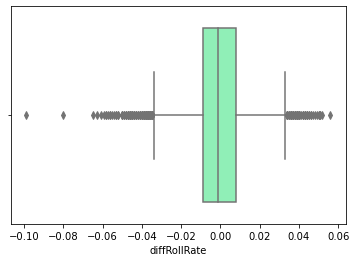

diffDiffClb
Feature: diffDiffClb


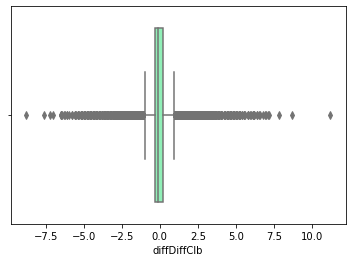

SeTime1
Feature: SeTime1


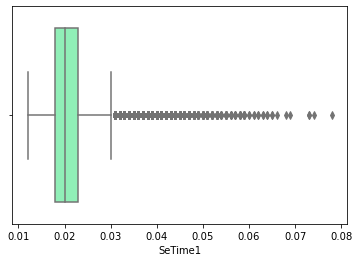

SeTime2
Feature: SeTime2


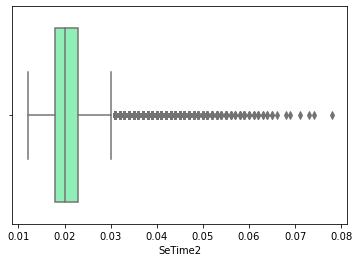

SeTime3
Feature: SeTime3


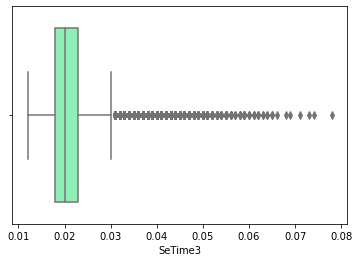

SeTime4
Feature: SeTime4


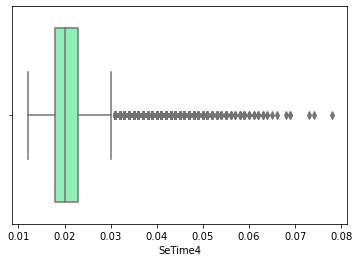

SeTime5
Feature: SeTime5


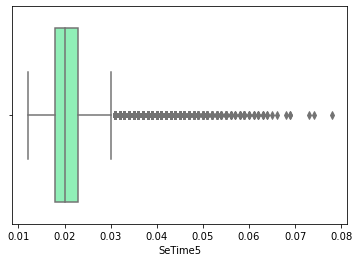

SeTime6
Feature: SeTime6


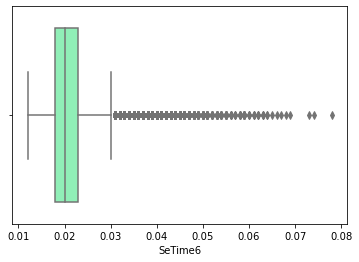

SeTime7
Feature: SeTime7


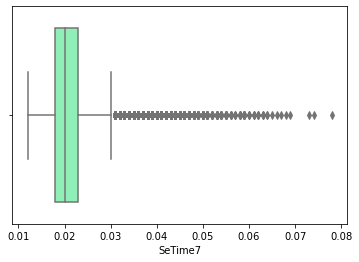

SeTime8
Feature: SeTime8


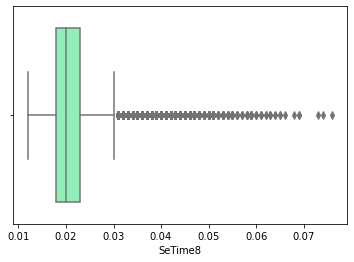

SeTime9
Feature: SeTime9


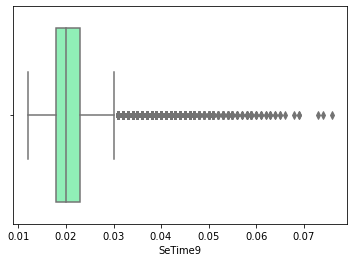

SeTime10
Feature: SeTime10


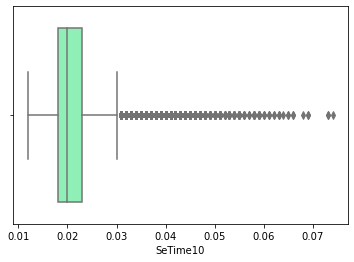

SeTime11
Feature: SeTime11


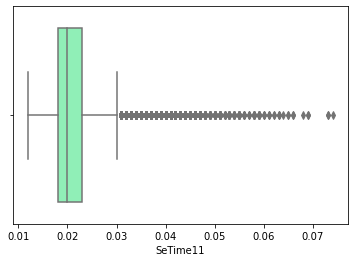

SeTime12
Feature: SeTime12


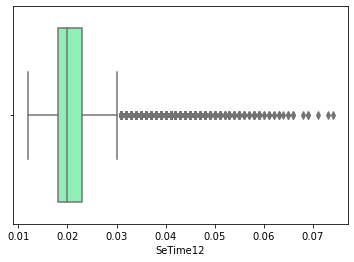

SeTime13
Feature: SeTime13


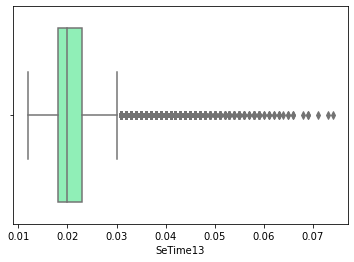

SeTime14
Feature: SeTime14


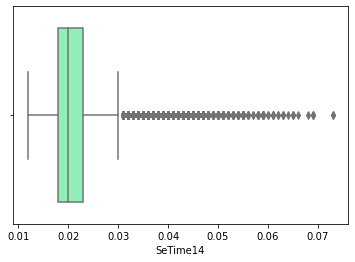

diffSeTime1
Feature: diffSeTime1


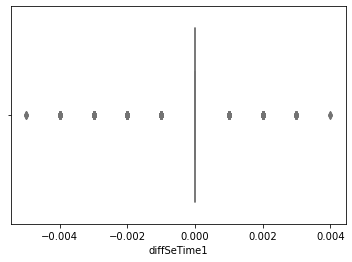

diffSeTime2
Feature: diffSeTime2


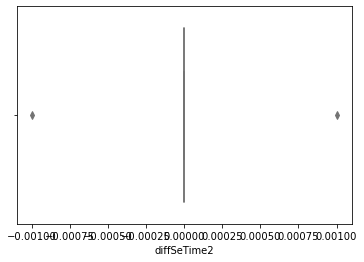

diffSeTime3
Feature: diffSeTime3


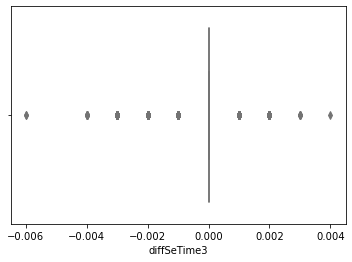

diffSeTime4
Feature: diffSeTime4


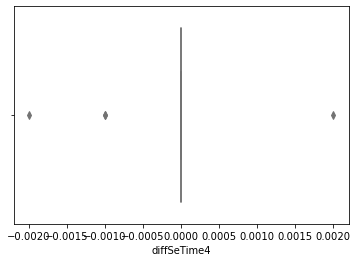

diffSeTime5
Feature: diffSeTime5


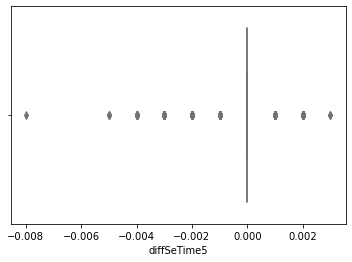

diffSeTime6
Feature: diffSeTime6


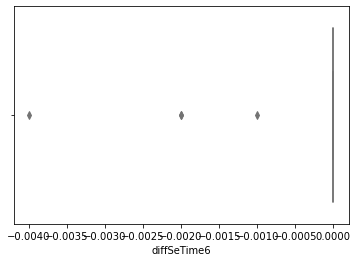

diffSeTime7
Feature: diffSeTime7


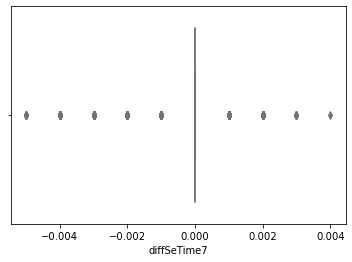

diffSeTime8
Feature: diffSeTime8


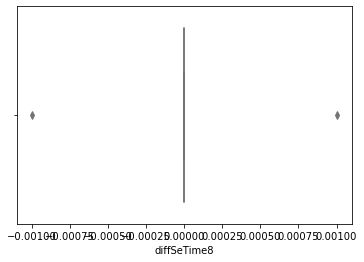

diffSeTime9
Feature: diffSeTime9


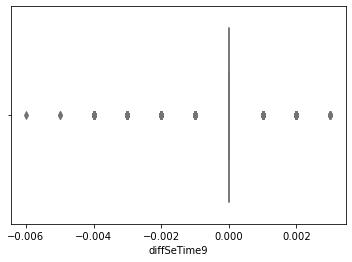

diffSeTime10
Feature: diffSeTime10


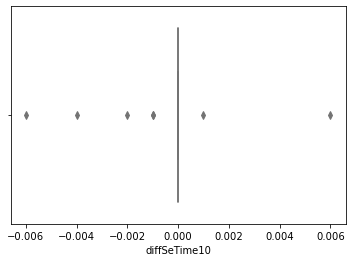

diffSeTime11
Feature: diffSeTime11


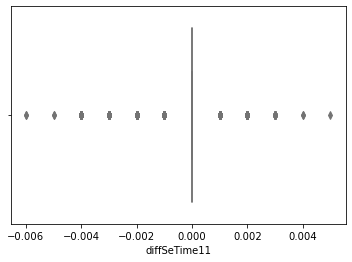

diffSeTime12
Feature: diffSeTime12


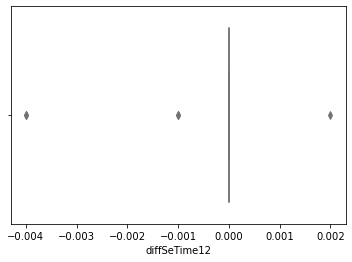

diffSeTime13
Feature: diffSeTime13


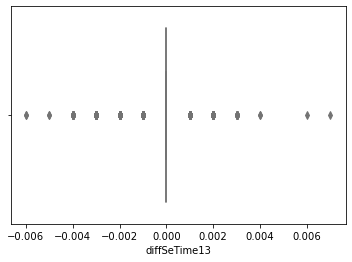

diffSeTime14
Feature: diffSeTime14


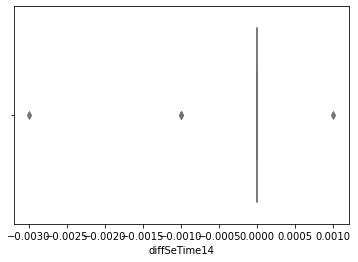

alpha
Feature: alpha


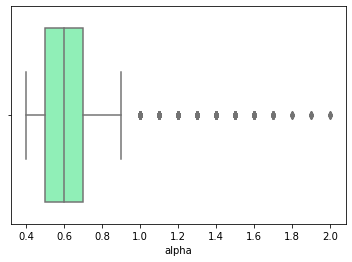

Se
Feature: Se


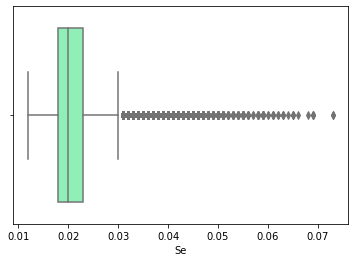

In [7]:
# checking outliers using boxplot

for i in df.columns[:-1]:
    print(i)
    sns.boxplot(x= df[i], data =df, palette ='rainbow')
    print("Feature:", i)
    plt.show()

**Observation**

From above boxplot, we can observe that all the columns contain outliers except "absRoll". So, we will treat these outliers using Inter-Quartile Range(IQR) method.

In [8]:
df1 = df.drop(['absRoll', 'goal' ], axis =1)
df1.head()

,climbRate,Sgz,p,q,curPitch,curRoll,diffClb,diffRollRate,diffDiffClb,SeTime1,...,diffSeTime7,diffSeTime8,diffSeTime9,diffSeTime10,diffSeTime11,diffSeTime12,diffSeTime13,diffSeTime14,alpha,Se
0,2,-56,-0.33,-0.09,0.90,0.2,12,0.004,-0.1,0.032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.032
1,470,-39,0.02,0.12,0.39,-0.6,8,0.009,-1.6,0.034,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.034
2,165,4,0.14,0.14,0.78,0.4,-9,-0.003,-0.2,0.034,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,1.0,0.034
3,-113,5,-0.12,0.11,1.06,0.6,-7,-0.008,0.0,0.033,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.033
4,-411,-21,-0.17,0.07,1.33,-0.6,0,0.002,0.1,0.030,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.002,0.0,0.9,0.032


In [9]:
# treating outliers

def treatoutliers(data):
    for cols in data.columns:
        Q1 = np.percentile(data[cols].values, 25)
        Q3 = np.percentile(data[cols].values, 75)
        IQR =Q3-Q1
        lower_limit = Q1-(1.5*IQR)
        upper_limit = Q3+(1.5*IQR)
        data.loc[:,cols] = np.where(data[cols].values > upper_limit, upper_limit, data[cols].values)
        data.loc[:,cols] = np.where(data[cols].values < lower_limit, lower_limit, data[cols].values)
    return data

treatoutliers(df1)

,climbRate,Sgz,p,q,curPitch,curRoll,diffClb,diffRollRate,diffDiffClb,SeTime1,...,diffSeTime7,diffSeTime8,diffSeTime9,diffSeTime10,diffSeTime11,diffSeTime12,diffSeTime13,diffSeTime14,alpha,Se
0,2.0,-56.0,-0.33,-0.09,0.90,0.2,12.0,0.004,-0.10,0.0305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0305
1,470.0,-39.0,0.02,0.12,0.39,-0.6,8.0,0.009,-1.05,0.0305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0305
2,165.0,4.0,0.14,0.14,0.78,0.4,-9.0,-0.003,-0.20,0.0305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0305
3,-113.0,5.0,-0.12,0.11,1.06,0.6,-7.0,-0.008,0.00,0.0305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0305
4,-411.0,-21.0,-0.17,0.07,1.33,-0.6,0.0,0.002,0.10,0.0300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12245,448.0,39.0,0.21,0.05,0.14,-0.5,-4.0,0.009,-0.10,0.0190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0190
12246,179.0,51.0,0.06,0.17,0.41,0.5,-9.0,-0.010,-0.60,0.0220,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0210
12247,65.0,51.0,-0.03,0.14,0.54,0.5,-17.0,-0.010,0.40,0.0220,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0210
12248,-22.0,51.0,-0.08,0.23,0.61,0.5,-15.0,-0.010,-0.60,0.0200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0220


climbRate
feature: climbRate


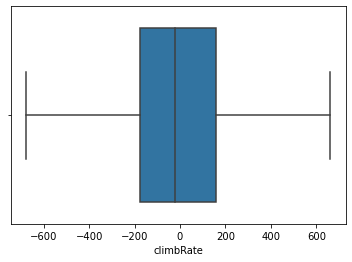

Sgz
feature: Sgz


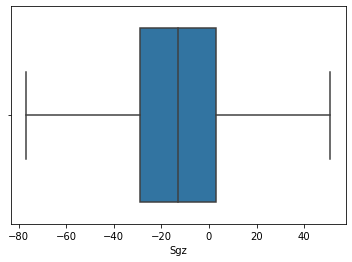

p
feature: p


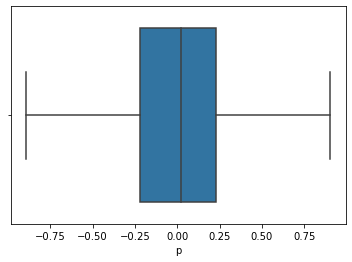

q
feature: q


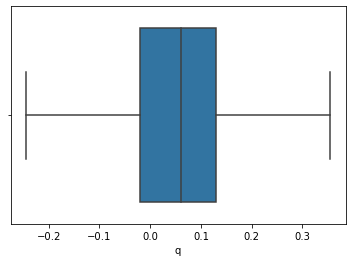

curPitch
feature: curPitch


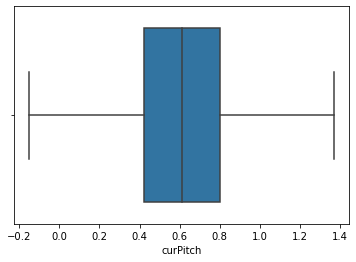

curRoll
feature: curRoll


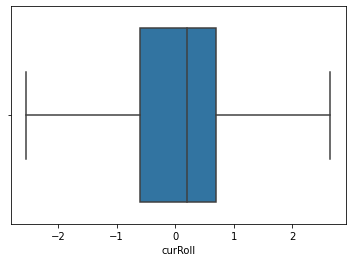

diffClb
feature: diffClb


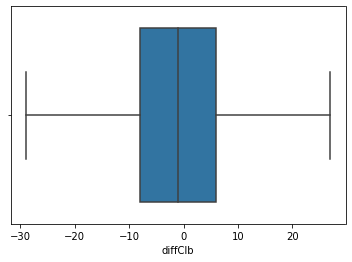

diffRollRate
feature: diffRollRate


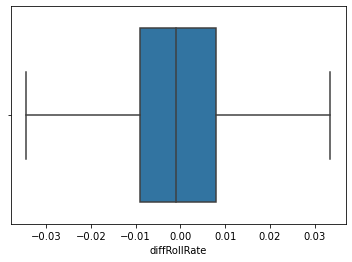

diffDiffClb
feature: diffDiffClb


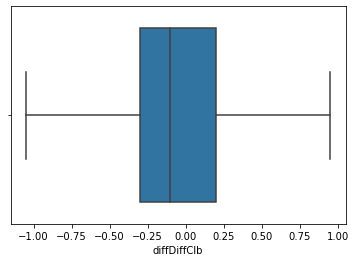

SeTime1
feature: SeTime1


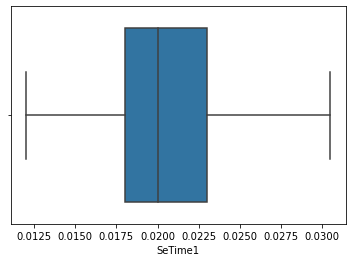

SeTime2
feature: SeTime2


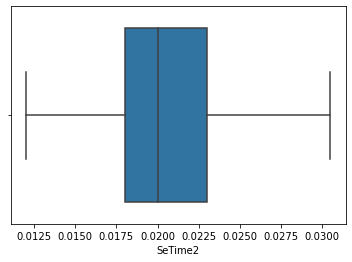

SeTime3
feature: SeTime3


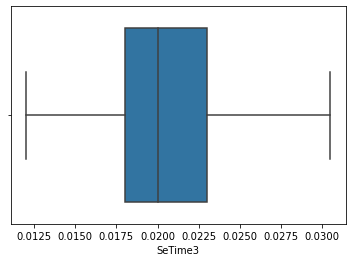

SeTime4
feature: SeTime4


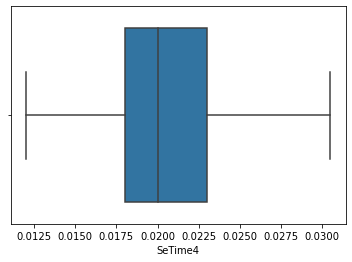

SeTime5
feature: SeTime5


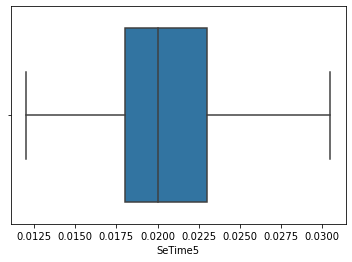

SeTime6
feature: SeTime6


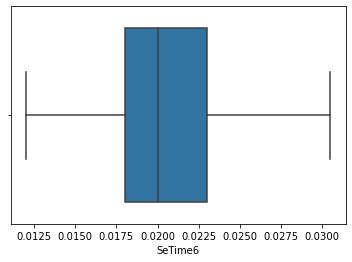

SeTime7
feature: SeTime7


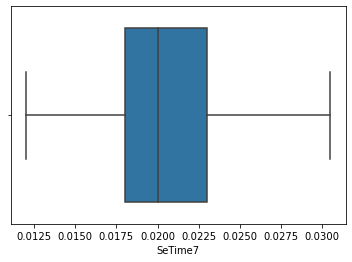

SeTime8
feature: SeTime8


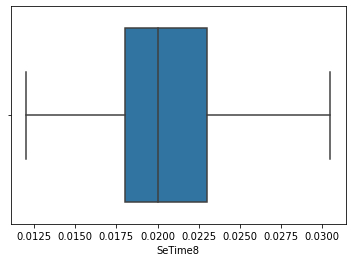

SeTime9
feature: SeTime9


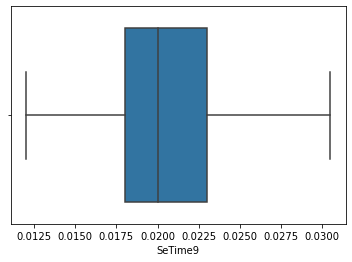

SeTime10
feature: SeTime10


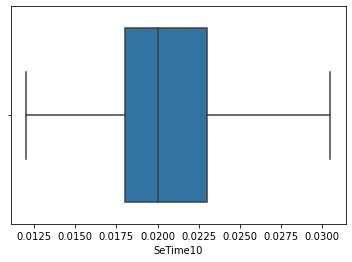

SeTime11
feature: SeTime11


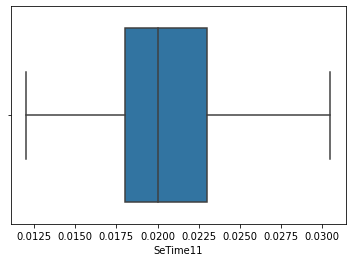

SeTime12
feature: SeTime12


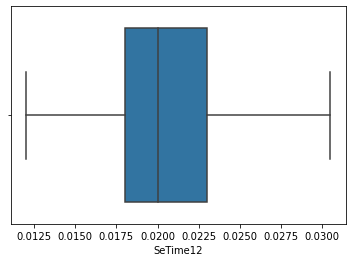

SeTime13
feature: SeTime13


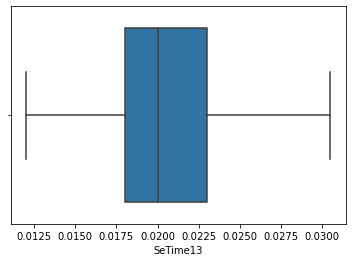

SeTime14
feature: SeTime14


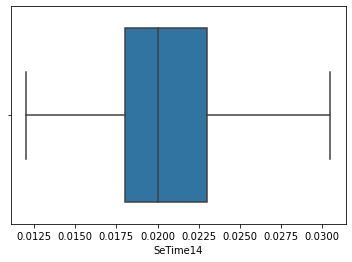

diffSeTime1
feature: diffSeTime1


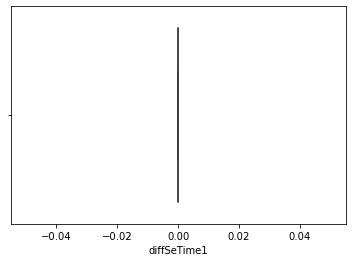

diffSeTime2
feature: diffSeTime2


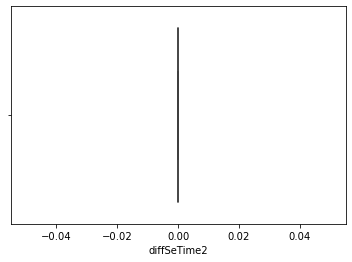

diffSeTime3
feature: diffSeTime3


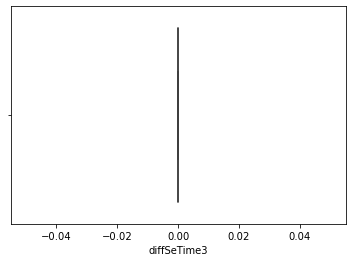

diffSeTime4
feature: diffSeTime4


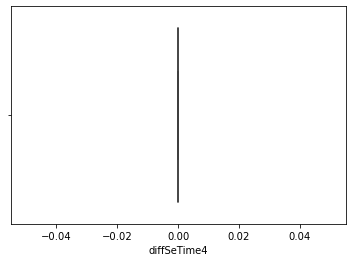

diffSeTime5
feature: diffSeTime5


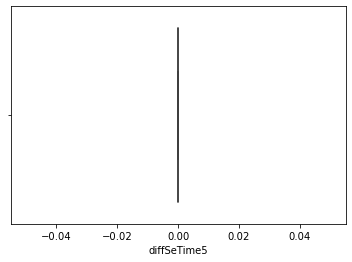

diffSeTime6
feature: diffSeTime6


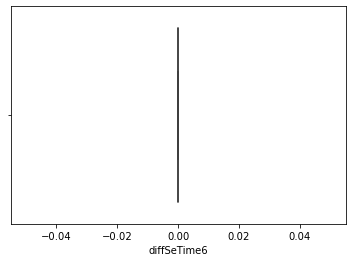

diffSeTime7
feature: diffSeTime7


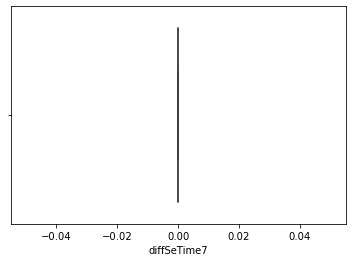

diffSeTime8
feature: diffSeTime8


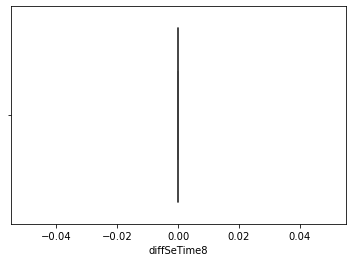

diffSeTime9
feature: diffSeTime9


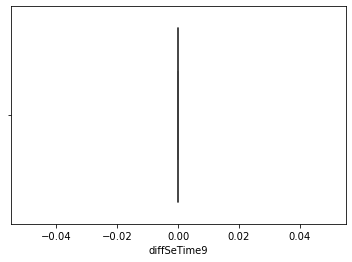

diffSeTime10
feature: diffSeTime10


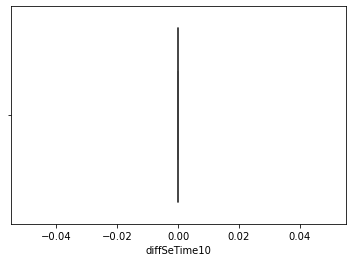

diffSeTime11
feature: diffSeTime11


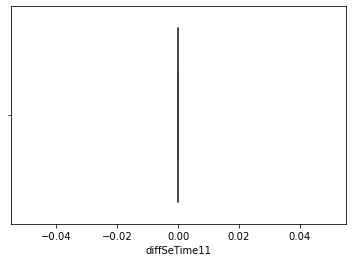

diffSeTime12
feature: diffSeTime12


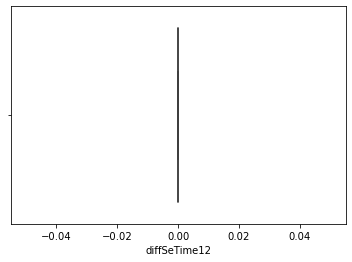

diffSeTime13
feature: diffSeTime13


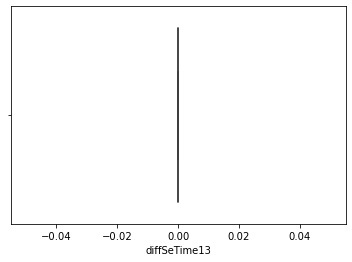

diffSeTime14
feature: diffSeTime14


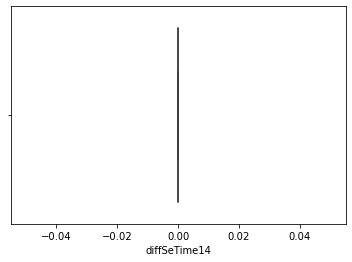

alpha
feature: alpha


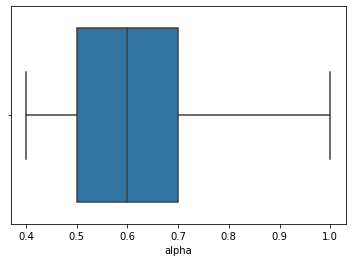

Se
feature: Se


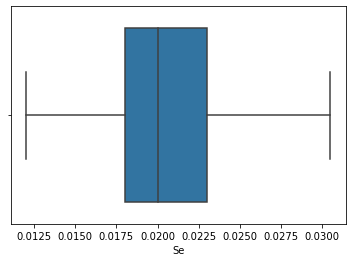

In [10]:
for i in df1.columns:
    print(i)
    sns.boxplot(x = df1[i], data = df1)
    print('feature:', i)
    plt.show()

In [11]:
# final dataframe without ouliers

new_df = pd.concat([df1, df[['absRoll', 'goal']]], axis =1)
new_df.head()

,climbRate,Sgz,p,q,curPitch,curRoll,diffClb,diffRollRate,diffDiffClb,SeTime1,...,diffSeTime9,diffSeTime10,diffSeTime11,diffSeTime12,diffSeTime13,diffSeTime14,alpha,Se,absRoll,goal
0,2.0,-56.0,-0.33,-0.09,0.90,0.2,12.0,0.004,-0.10,0.0305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0305,-11,-0.0009
1,470.0,-39.0,0.02,0.12,0.39,-0.6,8.0,0.009,-1.05,0.0305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0305,-12,-0.0011
2,165.0,4.0,0.14,0.14,0.78,0.4,-9.0,-0.003,-0.20,0.0305,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0305,-11,-0.0012
3,-113.0,5.0,-0.12,0.11,1.06,0.6,-7.0,-0.008,0.00,0.0305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0305,-10,-0.0011
4,-411.0,-21.0,-0.17,0.07,1.33,-0.6,0.0,0.002,0.10,0.0300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0305,-11,-0.0008


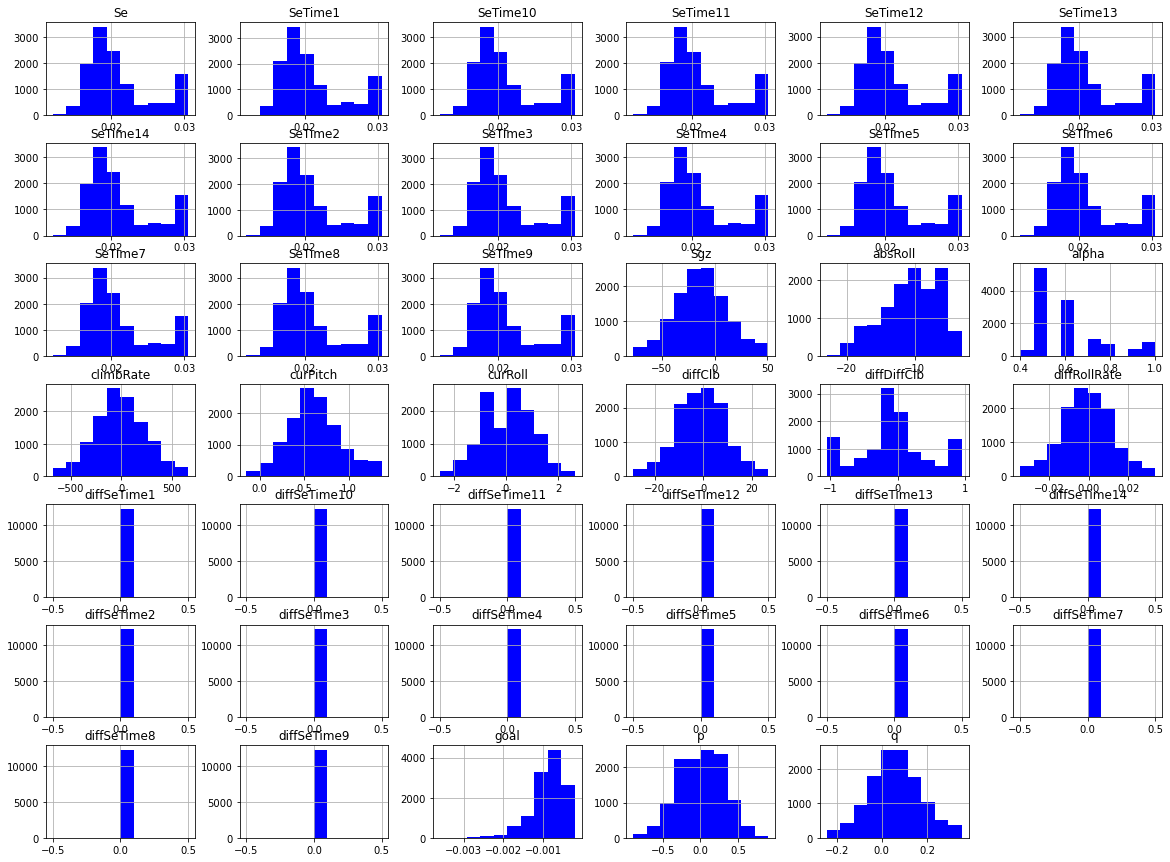

In [12]:
# using histogram that groups data into range

new_df.hist(figsize = (20,15), color = 'b')
plt.show()

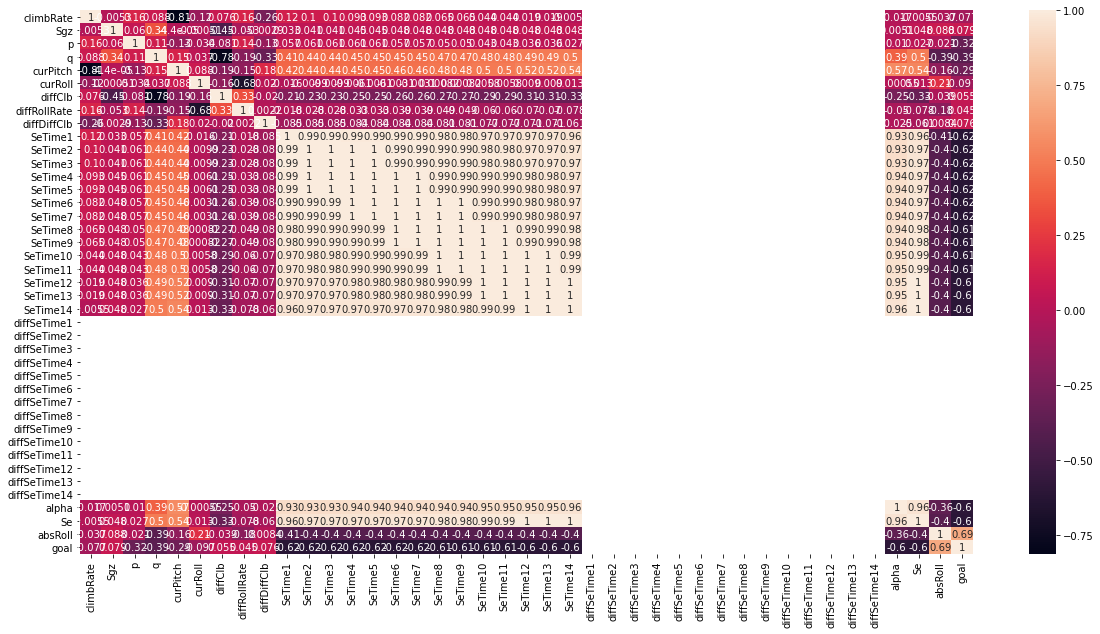

In [13]:
# using heatmap, which shows correlation between all the numerical variables

plt.figure(figsize =(20,10))
sns.heatmap(new_df.corr(method ="pearson"), annot =True)
plt.show()

In [14]:
# dropping some columns as they do not help in prediction

new_df.drop(['diffSeTime1', 'diffSeTime2', 'diffSeTime3', 'diffSeTime4',
       'diffSeTime5', 'diffSeTime6', 'diffSeTime7', 'diffSeTime8',
       'diffSeTime9', 'diffSeTime10', 'diffSeTime11', 'diffSeTime12',
       'diffSeTime13', 'diffSeTime14'], axis = 1, inplace =True)

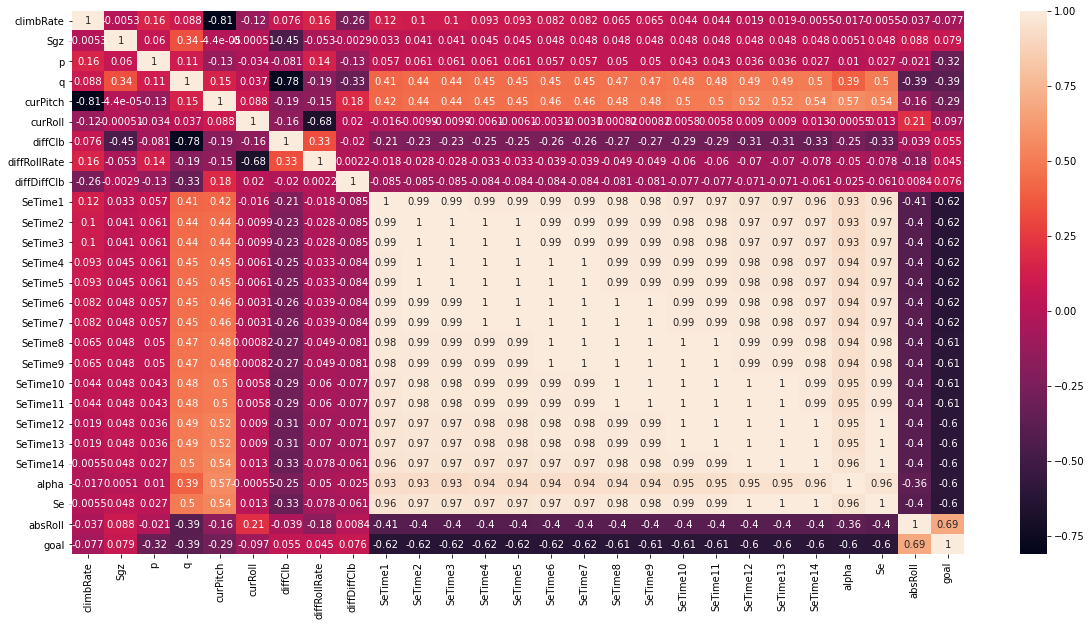

In [15]:
plt.figure(figsize =(20,10))
sns.heatmap(new_df.corr(method ="pearson"), annot =True)
plt.show()

**Observation**

From above heatmap, we can observe that there is a high correlation between columns 'alpha' and 'Se', 'SeTime1', 'SeTime2',
       'SeTime3', 'SeTime4', 'SeTime5', 'SeTime6', 'SeTime7', 'SeTime8',
       'SeTime9', 'SeTime10', 'SeTime11', 'SeTime12', 'SeTime13', 'SeTime14' only.
    

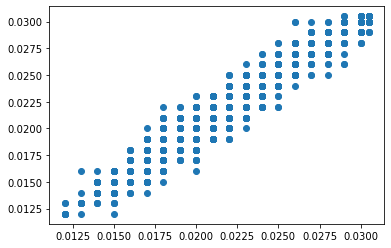

In [16]:
# using scatter plot for better understanding the data

plt.scatter(new_df['SeTime1'], new_df['SeTime2'])
plt.show()

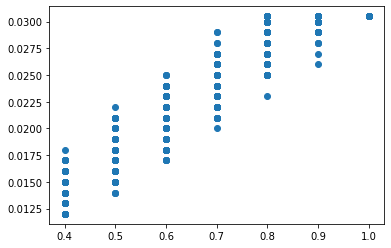

In [17]:
plt.scatter(new_df['alpha'], new_df['Se'])
plt.show()

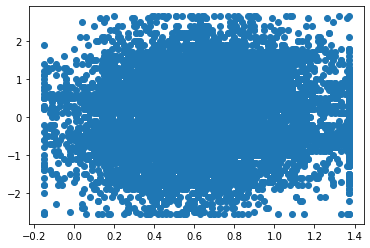

In [18]:
plt.scatter(new_df['curPitch'], new_df['curRoll'])
plt.show()

## Preparing the data

In [19]:
# Separating features and target 

X = new_df.drop(['goal'], axis =1)
Y = new_df['goal']

In [20]:
# splitting the data

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

# Building Linear Regression Model

## Training the model

In [21]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
model = lr.fit(X_train, Y_train)

In [22]:
# y_intercept and coefficient

intercept = model.intercept_

slope = model.coef_

display(intercept , slope)

0.0002821792530931077

array([-1.16991851e-06,  2.01302939e-07, -4.34133545e-04, -3.61790858e-04,
       -1.21754601e-03, -8.77514789e-05, -5.64969581e-06,  2.57996911e-03,
       -1.94431261e-05,  1.21933056e-03,  2.94274144e-03,  2.94274144e-03,
       -1.05769551e-02, -1.05769551e-02, -4.18097947e-03, -4.18097947e-03,
        3.60504473e-03,  3.60504473e-03, -2.33866349e-01,  2.43756031e-01,
       -1.23184625e-01,  1.15626565e-01,  1.57207221e-02, -2.27092779e-04,
        1.57207221e-02,  5.72517011e-05])

## Making predictions

In [23]:
Y_pred = model.predict(X_test)

In [24]:
# comparing Actual vs Predicted values

df_pred = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df_pred

,Actual,Predicted
8146,-0.0004,-0.000725
429,-0.0010,-0.000914
2927,-0.0004,-0.000362
8281,-0.0005,-0.000556
4721,-0.0009,-0.000639
...,...,...
7372,-0.0011,-0.001140
6179,-0.0012,-0.001369
8650,-0.0010,-0.000980
7244,-0.0006,-0.000867


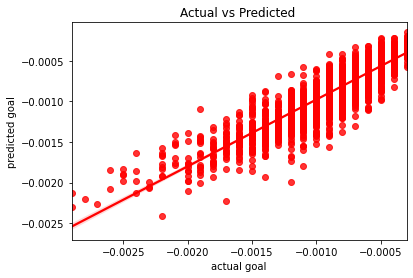

In [25]:
# Visualizing the actual and predicted values using regplot

sns.regplot(x = Y_test, y= Y_pred, data = new_df, color = 'red',fit_reg = True)
plt.xlabel('actual goal')
plt.ylabel('predicted goal')
plt.title('Actual vs Predicted ')
plt.show()  

In [26]:
# Accuracy

print('Train Accuracy :', round((model.score(X_train, Y_train)), 2)*100)

print('Test Accuracy :', round((model.score(X_test, Y_test)),2)*100)

Train Accuracy : 81.0
Test Accuracy : 81.0


## Evaluating the model

In [27]:
# Import metrics from sklearn

from sklearn.metrics import mean_squared_error, r2_score

# print result of MSE
print(mean_squared_error(Y_test, Y_pred))

# print result of RSME
print(np.sqrt(mean_squared_error(Y_test, Y_pred)))

# print result of coefficient of determination
r2 = r2_score(Y_test, Y_pred)
print(r2)

3.076435937458441e-08
0.00017539771770061437
0.8057228891184669


**Observation**

The model training accuracy and testing accuracy is 81% using Linear Regressor.

The Root Mean Square Error(RMSE) is 0.00017.

The Cofficient of Determination is 0.805, which means the regression relationship is strong; 80% of the variability in the dependent(target) variable is reduced by including the independent variable in the model.


In [28]:
# Ordinary Least Square(OLS) method

import statsmodels.api as sm

est = sm.OLS(Y_train,X_train)
est1 = est.fit()

print(est1.summary())

                                 OLS Regression Results                                
Dep. Variable:                   goal   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          1.302e+04
Date:                Wed, 02 Mar 2022   Prob (F-statistic):                        0.00
Time:                        03:05:58   Log-Likelihood:                          70423.
No. Observations:                9800   AIC:                                 -1.408e+05
Df Residuals:                    9780   BIC:                                 -1.407e+05
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

# Building Random Forest Regression Model

In [29]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(random_state = 42)
model_rf = regressor.fit(X_train,Y_train)

In [30]:
# checking model performance on actual test dataset

Y_pred_rf = model_rf.predict(X_test)

## Evaluating the model

In [31]:
df_pred_rf = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred_rf})
df_pred_rf

,Actual,Predicted
8146,-0.0004,-0.000727
429,-0.0010,-0.000631
2927,-0.0004,-0.000445
8281,-0.0005,-0.000547
4721,-0.0009,-0.000559
...,...,...
7372,-0.0011,-0.001146
6179,-0.0012,-0.001361
8650,-0.0010,-0.001188
7244,-0.0006,-0.000850


In [32]:
from sklearn.metrics import mean_squared_error, r2_score

print('MSE: ', mean_squared_error(Y_test, Y_pred_rf))

print('RMSE: ',np.sqrt(mean_squared_error(Y_test, Y_pred_rf)))

print('R2: ',r2_score(Y_test, Y_pred_rf)*100)

MSE:  2.7353111428571436e-08
RMSE:  0.00016538776081854255
R2:  82.72649400151766


<Figure size 2160x2160 with 0 Axes>

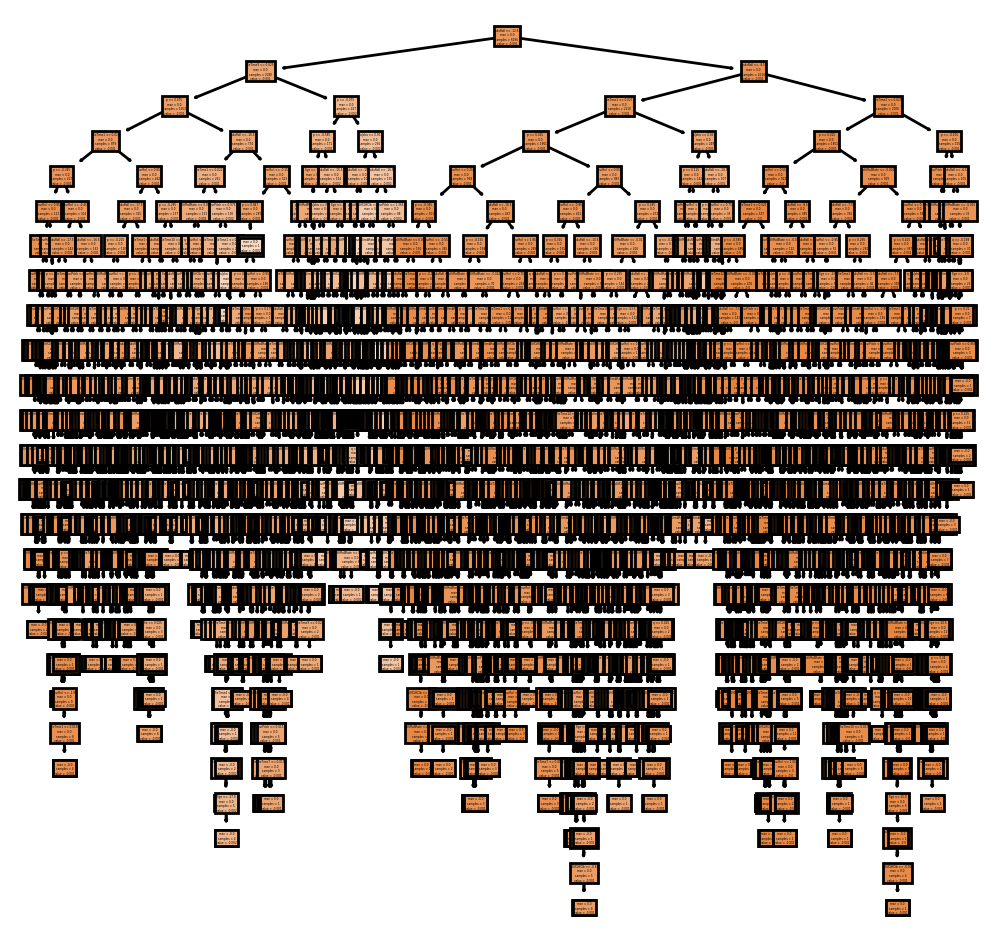

In [33]:
# visualizing 

from sklearn.tree import plot_tree

plt.figure(figsize =(30,30))

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=200)

plot_tree(model_rf.estimators_[0],
               feature_names = X_train.columns,
               filled = True);

fig.savefig('rf_singletree.png')

## Random Forest using GridSearch CV

In [33]:
# hyperparameter tuning

from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100,200,300,400],
             'max_depth': [70,80,90,100]} 


rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1)

grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [70, 80, 90, 100],
                         'n_estimators': [100, 200, 300, 400]})

In [34]:
print(grid_search.best_score_)

0.819830368194008


In [35]:
print(grid_search.best_params_)

{'max_depth': 70, 'n_estimators': 400}


In [36]:
pred = grid_search.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

print('MSE: ', mean_squared_error(Y_test, pred))

print('RMSE: ',np.sqrt(mean_squared_error(Y_test, pred)))

print('R2: ',r2_score(Y_test, pred)*100)

MSE:  2.7127509872448987e-08
RMSE:  0.00016470431042461817
R2:  82.8689615172562
